In [1]:
import pandas as pd

# Load datasets
df1 = pd.read_csv('C:/Users/Admin/Desktop/datasets-i/datafile.csv')
df2 = pd.read_csv('C:/Users/Admin/Desktop/datasets-i/datafile1.csv')
df3 = pd.read_csv('C:/Users/Admin/Desktop/datasets-i/datafile2.csv')
df4 = pd.read_csv('C:/Users/Admin/Desktop/datasets-i/datafile3.csv')
df5 = pd.read_csv('C:/Users/Admin/Desktop/datasets-i/produce.csv')

# Check the structure of each dataset
print(df1.head())
print(df1.info())

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


             Crop  2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  \
0            Rice    100.0    101.0     99.0    105.0    112.0    121.0   
1           Wheat    100.0    101.0    112.0    115.0    117.0    127.0   
2  Coarse Cereals    100.0    107.0    110.0    115.0    113.0    123.0   
3          Pulses    100.0    108.0    134.0    124.0    124.0    146.0   
4     Vegetables     100.0    109.0    103.0    118.0    113.0    124.0   

   2010-11  2011-12  
0    117.0    110.0  
1    120.0    108.0  
2    122.0    136.0  
3    137.0    129.0  
4    128.0    115.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Crop     12 non-null     object 
 1   2004-05  12 non-null     float64
 2   2005-06  12 non-null     float64
 3   2006-07  12 non-null     float64
 4   2007-08  12 non-null     float64
 5   2008-09  12 non-null     float64
 6   2009-1

In [2]:
# Example: Check missing values
print(df1.isnull().sum())

Crop       1
2004-05    1
2005-06    1
2006-07    1
2007-08    1
2008-09    1
2009-10    1
2010-11    1
2011-12    1
dtype: int64


In [4]:
#This is a count of unique values in each column of a DataFrame, possibly generated using DataFrame.nunique()
print(df1.nunique())

Crop       12
2004-05     1
2005-06    10
2006-07     9
2007-08    10
2008-09    11
2009-10    12
2010-11    11
2011-12    12
dtype: int64


In [6]:
print(df1.head())  # Display the first few rows of the dataset
print(df1.info())  # Check column types and identify missing data

             Crop  2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  \
0            Rice    100.0    101.0     99.0    105.0    112.0    121.0   
1           Wheat    100.0    101.0    112.0    115.0    117.0    127.0   
2  Coarse Cereals    100.0    107.0    110.0    115.0    113.0    123.0   
3          Pulses    100.0    108.0    134.0    124.0    124.0    146.0   
4     Vegetables     100.0    109.0    103.0    118.0    113.0    124.0   

   2010-11  2011-12  
0    117.0    110.0  
1    120.0    108.0  
2    122.0    136.0  
3    137.0    129.0  
4    128.0    115.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Crop     12 non-null     object 
 1   2004-05  12 non-null     float64
 2   2005-06  12 non-null     float64
 3   2006-07  12 non-null     float64
 4   2007-08  12 non-null     float64
 5   2008-09  12 non-null     float64
 6   2009-1

In [8]:
# Clean the Data
#Remove Rows with Missing Crop Values
df1 = df1.dropna(subset=['Crop'])

In [9]:
#Rename Columns for Simplicity:
df1.columns = df1.columns.str.lower().str.replace('-', '_')

In [10]:
print(df1.duplicated().sum())  # Number of duplicate rows

0


In [11]:
#Check the Data for Reshaping
#Ensure your data is in the wide format (years as columns) and ready to be reshaped into a long format.
print(df1.head())  # Confirm the structure before reshaping

             crop  2004_05  2005_06  2006_07  2007_08  2008_09  2009_10  \
0            Rice    100.0    101.0     99.0    105.0    112.0    121.0   
1           Wheat    100.0    101.0    112.0    115.0    117.0    127.0   
2  Coarse Cereals    100.0    107.0    110.0    115.0    113.0    123.0   
3          Pulses    100.0    108.0    134.0    124.0    124.0    146.0   
4     Vegetables     100.0    109.0    103.0    118.0    113.0    124.0   

   2010_11  2011_12  
0    117.0    110.0  
1    120.0    108.0  
2    122.0    136.0  
3    137.0    129.0  
4    128.0    115.0  


In [12]:
#convert the years into a single Year column, with corresponding production values in the Value column.
# Reshape the data from wide to long format
df1_long = df1.melt(id_vars=['crop'], var_name='year', value_name='value')

# Check the reshaped data
print(df1_long.head())

             crop     year  value
0            Rice  2004_05  100.0
1           Wheat  2004_05  100.0
2  Coarse Cereals  2004_05  100.0
3          Pulses  2004_05  100.0
4     Vegetables   2004_05  100.0


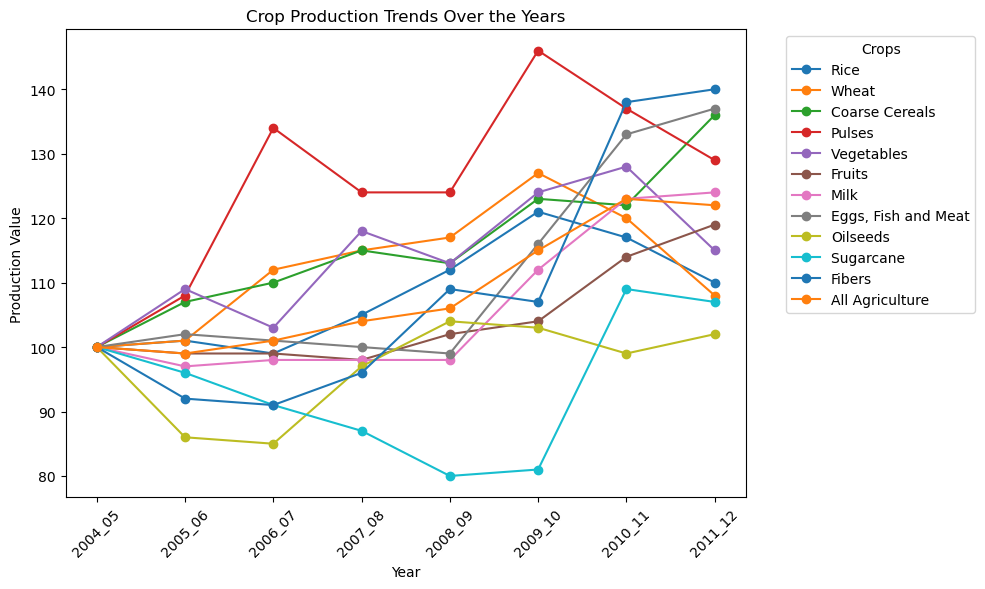

In [14]:
#Visualize Growth Rates It could be helpful to visualize the growth rates to understand the trends.
plt.figure(figsize=(10, 6))

for crop in df1_long['crop'].unique():
    crop_data = df1_long[df1_long['crop'] == crop]
    plt.plot(crop_data['year'], crop_data['value'], marker='o', label=crop)

plt.title("Crop Production Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Production Value")
plt.xticks(rotation=45)
plt.legend(title="Crops", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [15]:
# Calculate the growth rate (percentage change) year-over-year for each crop
df1_long['growth_rate'] = df1_long.groupby('crop')['value'].pct_change()

# Display the updated data
print(df1_long.head())

             crop     year  value  growth_rate
0            Rice  2004_05  100.0          NaN
1           Wheat  2004_05  100.0          NaN
2  Coarse Cereals  2004_05  100.0          NaN
3          Pulses  2004_05  100.0          NaN
4     Vegetables   2004_05  100.0          NaN


In [16]:
# Drop rows with NaN growth_rate (optional)
df1_long_cleaned = df1_long.dropna(subset=['growth_rate'])

# Check the cleaned data
print(df1_long_cleaned.head())

              crop     year  value  growth_rate
12            Rice  2005_06  101.0         0.01
13           Wheat  2005_06  101.0         0.01
14  Coarse Cereals  2005_06  107.0         0.07
15          Pulses  2005_06  108.0         0.08
16     Vegetables   2005_06  109.0         0.09


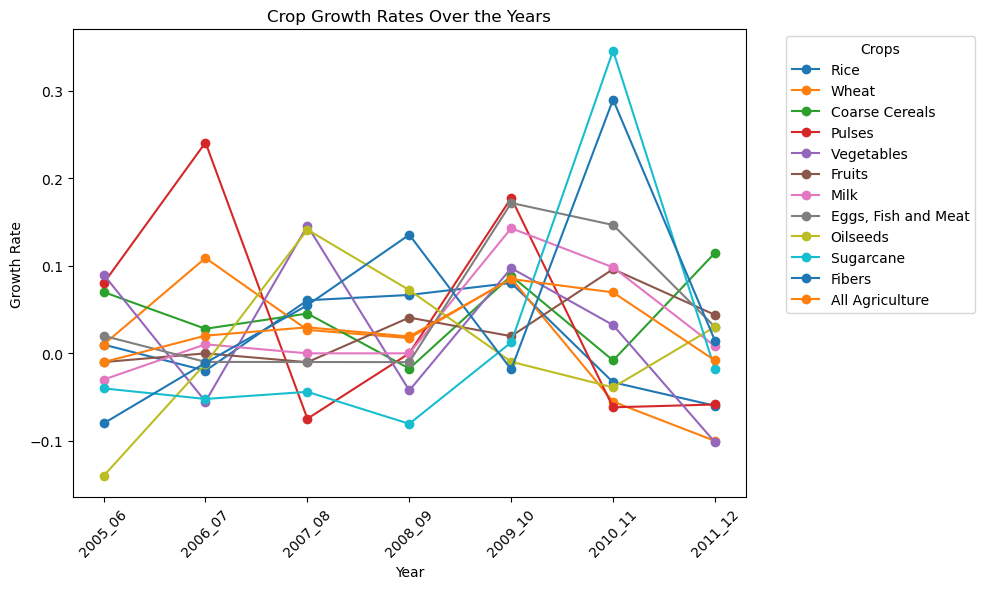

In [18]:
import matplotlib.pyplot as plt

# Create a line plot using matplotlib
plt.figure(figsize=(10, 6))

# Loop through each crop and plot its growth rate over the years
for crop in df1_long_cleaned['crop'].unique():
    crop_data = df1_long_cleaned[df1_long_cleaned['crop'] == crop]
    plt.plot(crop_data['year'], crop_data['growth_rate'], marker='o', label=crop)

plt.title("Crop Growth Rates Over the Years")
plt.xlabel("Year")
plt.ylabel("Growth Rate")
plt.xticks(rotation=45)
plt.legend(title="Crops", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [19]:
#Correlation Analysis
#check if the growth rate has any significant correlation with other features such as production values. This can help you understand how the growth rate impacts crop production.
correlation_matrix = df1_long_cleaned[['value', 'growth_rate']].corr()
print(correlation_matrix)
#This will give you the correlation between value (production) and growth_rate

               value  growth_rate
value        1.00000      0.41566
growth_rate  0.41566      1.00000


In [22]:
#Training a Regression Model
#Prepare the Features and Target
#Define the feature matrix X and target vector y
X = df1_long_cleaned[['crop_encoded', 'year', 'growth_rate']]
y = df1_long_cleaned['value']
#Ensure year is encoded numerically if it’s not already (e.g., 2004_05 → 2005)

In [23]:
#Split the Data into Training and Testing Sets
#Use train_test_split from sklearn to divide the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#test_size=0.2 keeps 20% of the data for testing.
#random_state=42 ensures reproducibility.

In [24]:
#Train a Regression Model
#Import and instantiate a regression model. For simplicity, start with Linear Regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [25]:
#Train the model using the training data.
model.fit(X_train, y_train)

LinearRegression()

In [26]:
#Make Predictions
#Predict the target values for both training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [27]:
#Import metrics for evaluation
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
#Calculate metrics for both training and testing sets
# Training evaluation
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Testing evaluation
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training MSE: {mse_train:.2f}, R²: {r2_train:.2f}")
print(f"Testing MSE: {mse_test:.2f}, R²: {r2_test:.2f}")

Training MSE: 125.67, R²: 0.41
Testing MSE: 56.83, R²: 0.56


In [29]:
#If you use a model like Random Forest, you can analyze feature importance:
#Import and train the model
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [30]:
#Extract feature importance.
feature_importance = rf_model.feature_importances_
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance:.2f}")

crop_encoded: 0.23
year: 0.40
growth_rate: 0.37


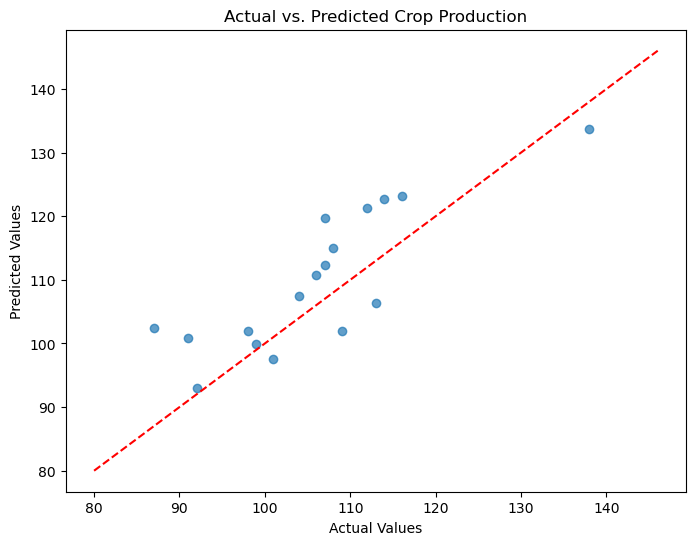

In [31]:
#Plot actual vs. predicted values for testing data.
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Crop Production")
plt.show()

In [32]:
#TESTING AGAIN
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare the data
X = df1_long_cleaned[['crop_encoded', 'growth_rate']]  # Adjust if columns differ
y = df1_long_cleaned['value']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
#R-squared (r2): Shows how well the model explains the variance in crop production.
#Close to 1 = Good model fit.
#Close to 0 = Poor model fit.
#Mean Squared Error (mse): Lower values indicate better predictions

Mean Squared Error: 87.55045070478589
R-squared: 0.32714391411330923


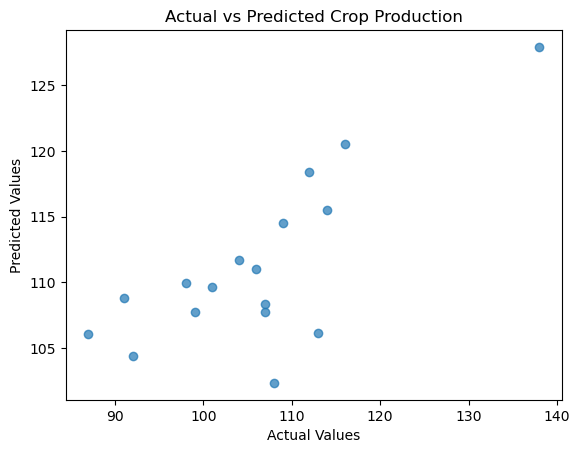

In [34]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Crop Production")
plt.show()

In [35]:
new_data = [[1, 0.05]]  # Example: Crop-encoded=1, Growth rate=5%
predicted_value = model.predict(new_data)
print("Predicted Crop Production:", predicted_value[0])

Predicted Crop Production: 112.85533306295395


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:
#evaluating quality of outcome
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 7.870915109659901


In [ ]:
#The Mean Absolute Error (MAE) is approximately 7.87, which means that, on average, the model's predictions are off by about 7.87 units of crop production.

#This is a decent starting point, but whether it's a good result depends on the scale of your crop production data. If the crop production values are in the hundreds (e.g., 100-200 units), this might indicate that your model is providing reasonably good predictions.

In [37]:
#trying random forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define and fit the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate performance metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Absolute Error: {mae_rf}")
print(f"Random Forest - R-squared: {r2_rf}")

Random Forest - Mean Absolute Error: 9.371176470588232
Random Forest - R-squared: 0.09800013562387


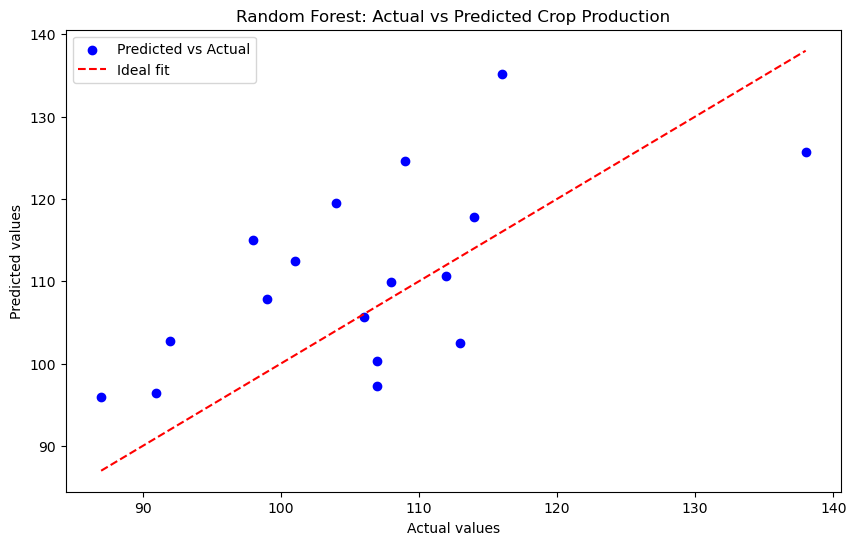

In [38]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_rf, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal fit')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Random Forest: Actual vs Predicted Crop Production')
plt.legend()
plt.show()

In [39]:
#Hyperparameter Tuning for Random Forest
#use GridSearchCV to tune the hyperparameters of the Random Forest model to improve its performance:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_rf_model = grid_search.best_estimator_

# Predict on the test set
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the best model
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Best Random Forest - Mean Absolute Error: {mae_best_rf}")
print(f"Best Random Forest - R-squared: {r2_best_rf}")

Best Random Forest - Mean Absolute Error: 8.811631204503087
Best Random Forest - R-squared: 0.3029479809251677


In [40]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"Random Forest - Cross-validated MAE: {cv_scores.mean()}")

Random Forest - Cross-validated MAE: -11.552926470588236


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a Linear Regression model
lr_model = LinearRegression()

# Cross-validation for Linear Regression
cv_scores_lr = cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"Linear Regression - Cross-validated MAE: {cv_scores_lr.mean()}")

Linear Regression - Cross-validated MAE: -12.042306790261549


In [ ]:
#The Linear Regression model's cross-validated Mean Absolute Error (MAE) is approximately 12.04.

#Now that you have the cross-validated MAE for both models:

#Random Forest: ~11.55
#Linear Regression: ~12.04
#Interpretation:
#Lower MAE is better. So, in this case, Random Forest performs slightly better in terms of prediction accuracy.

In [46]:
from sklearn.metrics import r2_score

# Linear Regression - Fit the model and predict
lr_model.fit(X, y)
y_pred_lr = lr_model.predict(X)

# Calculate R-squared for Linear Regression
r2_lr = r2_score(y, y_pred_lr)
print(f"Linear Regression - R-squared: {r2_lr}")

# Random Forest - Fit the model and predict
rf_model.fit(X, y)
y_pred_rf = rf_model.predict(X)

# Calculate R-squared for Random Forest
r2_rf = r2_score(y, y_pred_rf)
print(f"Random Forest - R-squared: {r2_rf}")

Linear Regression - R-squared: 0.1727732842756713
Random Forest - R-squared: 0.8700761037663141


In [45]:
# Ensure the model is fitted with the entire dataset
lr_model.fit(X, y)

# Make predictions with the fitted model
y_pred_lr = lr_model.predict(X)

# Calculate MSE for Linear Regression
mse_lr = mean_squared_error(y, y_pred_lr)
print(f"Linear Regression - Mean Squared Error: {mse_lr}")

# For Random Forest, ensure the model is fitted properly
rf_model.fit(X, y)

# Make predictions for Random Forest
y_pred_rf = rf_model.predict(X)

# Calculate MSE for Random Forest
mse_rf = mean_squared_error(y, y_pred_rf)
print(f"Random Forest - Mean Squared Error: {mse_rf}")

Linear Regression - Mean Squared Error: 166.1107823226508
Random Forest - Mean Squared Error: 26.089292857142855


In [ ]:
#Random Forest performs significantly better than Linear Regression, both in terms of R-squared and Mean Squared Error.
#Random Forest outperforms Linear Regression in both R-squared and Mean Squared Error.
#With an R-squared of 87.01%, Random Forest provides a much better fit to the data and is more capable of making accurate predictions.
#The MSE of 26.09 for Random Forest indicates that its predictions have much smaller errors compared to Linear Regression, which has an MSE of 166.11.

In [ ]:
#WEEK-02

In [6]:
pip install xgboost

     -------------------------------------- 124.9/124.9 MB 4.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd

# Load datasets
df1 = pd.read_csv('C:/Users/Admin/Desktop/datasets-i/datafile.csv')
df2 = pd.read_csv('C:/Users/Admin/Desktop/datasets-i/datafile1.csv')
df3 = pd.read_csv('C:/Users/Admin/Desktop/datasets-i/datafile2.csv')
df4 = pd.read_csv('C:/Users/Admin/Desktop/datasets-i/datafile3.csv')
df5 = pd.read_csv('C:/Users/Admin/Desktop/datasets-i/produce.csv')

# Check the structure of each dataset
print(df1.head())
print(df1.info())

             Crop  2004-05  2005-06  2006-07  2007-08  2008-09  2009-10  \
0            Rice    100.0    101.0     99.0    105.0    112.0    121.0   
1           Wheat    100.0    101.0    112.0    115.0    117.0    127.0   
2  Coarse Cereals    100.0    107.0    110.0    115.0    113.0    123.0   
3          Pulses    100.0    108.0    134.0    124.0    124.0    146.0   
4     Vegetables     100.0    109.0    103.0    118.0    113.0    124.0   

   2010-11  2011-12  
0    117.0    110.0  
1    120.0    108.0  
2    122.0    136.0  
3    137.0    129.0  
4    128.0    115.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Crop     12 non-null     object 
 1   2004-05  12 non-null     float64
 2   2005-06  12 non-null     float64
 3   2006-07  12 non-null     float64
 4   2007-08  12 non-null     float64
 5   2008-09  12 non-null     float64
 6   2009-1

In [12]:
# Ensure df1 has the required columns
print(df1.columns)

Index(['Crop', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09',
       '2009-10', '2010-11', '2011-12'],
      dtype='object')


In [13]:
df1_cleaned = df1.dropna(subset=['growth_rate'])  # Assuming 'growth_rate' is the target feature
print(df1_cleaned.head())

KeyError: ['growth_rate']

In [14]:
print(df1.columns)

Index(['Crop', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09',
       '2009-10', '2010-11', '2011-12'],
      dtype='object')


In [15]:
df1_cleaned = df1.dropna(subset=['Growth Rate'])  # Use correct column name

KeyError: ['Growth Rate']

In [16]:
print(df1.columns)

Index(['Crop', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09',
       '2009-10', '2010-11', '2011-12'],
      dtype='object')


In [17]:
import pandas as pd

# Load the dataset
df1 = pd.read_csv('C:/Users/Admin/Desktop/datasets-i/datafile.csv')

# Reshape the data into a long format
df1_long = pd.melt(df1, id_vars=["Crop"], var_name="Year", value_name="Value")

# Convert 'Year' to a numerical format for easier analysis (e.g., 2004-05 becomes 2004)
df1_long['Year'] = df1_long['Year'].str.split('-').str[0].astype(int)

# Sort by crop and year for proper growth rate calculation
df1_long = df1_long.sort_values(by=["Crop", "Year"])

# Calculate the growth rate (percentage change) for each crop
df1_long['Growth_Rate'] = df1_long.groupby('Crop')['Value'].pct_change()

# Drop rows with NaN growth rates (for the first year of each crop)
df1_long_cleaned = df1_long.dropna(subset=['Growth_Rate'])

# Check the cleaned data
print(df1_long_cleaned.head())

               Crop  Year  Value  Growth_Rate
24  All Agriculture  2005   99.0    -0.010000
37  All Agriculture  2006  101.0     0.020202
50  All Agriculture  2007  104.0     0.029703
63  All Agriculture  2008  106.0     0.019231
76  All Agriculture  2009  115.0     0.084906
